<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/7_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Axes: xlabel='alcohol', ylabel='total'>

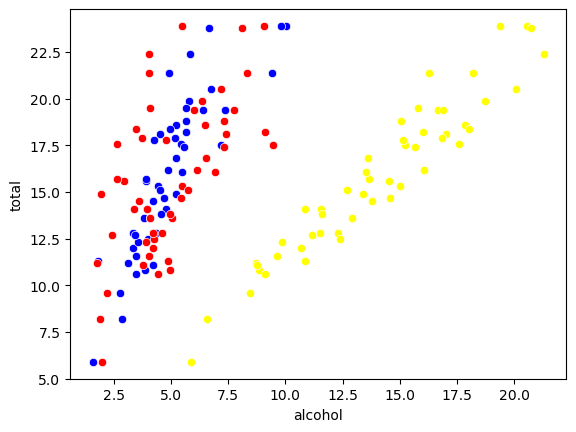

In [3]:
from turtle import color


sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='speeding', y='total', color="red", data=df)
sns.scatterplot(x='no_previous', y='total', color="yellow", data=df)

In [4]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['alcohol', 'speeding','no_previous', 'not_distracted']]
Var_Dep= df['total']

In [5]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [6]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [7]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol', 'speeding', 'no_previous', 'not_distracted'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.48569847, -0.03553262,  0.72406358,  0.17761515]),
 'rank_': 4,
 'singular_': array([41.26555372, 14.61882636, 11.09162979,  6.21782763]),
 'intercept_': np.float64(1.0430643925251992)}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [8]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.956182257807773

In [9]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['alcohol', 'speeding', 'no_previous', 'not_distracted']])
y_pred

array([17.61739306, 18.18973093, 19.04520305, 22.87644232, 12.19833071,
       13.97700264, 10.836113  , 17.30065976,  7.06540812, 18.53881811,
       15.96894067, 17.76481307, 16.16888917, 14.02744857, 15.37724521,
       15.44947987, 16.33667369, 18.03011877, 21.27831603, 14.55674496,
       13.37146589,  8.38696804, 13.08067278,  9.93417481, 16.6553508 ,
       15.87885694, 21.6833724 , 15.67806096, 16.15222092, 11.35280887,
       10.53874889, 18.57774639, 11.68298645, 15.99772794, 24.80813771,
       14.08217306, 20.41587002, 12.37381908, 18.15992251, 11.12075988,
       23.57206529, 19.39590881, 17.92083365, 19.70426334, 11.36940098,
       14.55358591, 12.67738859, 10.72824089, 23.08511286, 12.42767893,
       17.32990467])

In [10]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones0', y_pred)
df

,Predicciones0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.617393,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.189731,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,19.045203,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.876442,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.198331,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.977003,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.836113,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,17.300660,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,7.065408,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,18.538818,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


ValueError: Could not interpret value `Predicciones` for `y`. An entry with this name does not appear in `data`.

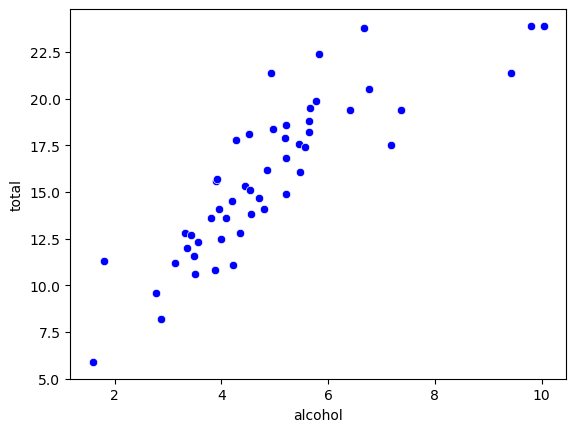

In [11]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9561822578077731

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9778457229071328